# Supplementary Fig. 11b: Repeat divergence (Jukes Cantor)

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
 

In [2]:
import re
def natural_sort(l): 
    convert = lambda text: int(text) if text.isdigit() else text.lower() 
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(l, key = alphanum_key)
def load_genome_index(index_file, chr_prefix):
    Genome_index = pd.read_csv(index_file, sep='\t', names=['Chr','Length','A','B','C'])
    Genome_index = Genome_index[Genome_index.Chr.str.startswith(chr_prefix)][['Chr','Length']]
    new_indexes = []
    for i in natural_sort(Genome_index.Chr): 
        new_indexes.append(Genome_index.Chr.to_list().index(i))
    Genome_index = Genome_index.loc[new_indexes].reset_index()
    Genome_index = Genome_index.drop(columns='index')
    return(Genome_index)

def load_Centromeric_positions_for_Xtr(file_path):
    Xtr_Centromeric_pos = pd.read_csv(file_path,sep='\t')
    return(Xtr_Centromeric_pos)

def JC_divergence(divergence):
    JC = -3/4*np.log(1-4*(float(divergence)/100)/3)
    return(JC)



In [4]:
source_data_path = 'SourceData'
sup_fig = 'Supplementary_Fig.11'
sup_fig_panel = 'c'

sup_fig_dir = os.path.join(source_data_path,sup_fig)
sup_fig_panel_dir = os.path.join(sup_fig_dir,sup_fig+'b')

paths_files_fig = os.path.join(source_data_path, sup_fig)

chr_sizes = pd.read_csv(os.path.join(sup_fig_dir,"Xentr10.chrom.sizes"), sep='\t', names=["Chr","Length"])
Xtrop_centromere_positon = load_Centromeric_positions_for_Xtr(os.path.join(sup_fig_dir,'Xtr_centromeric_repeats.tsv'))

Rec_rate = pd.read_csv(os.path.join(sup_fig_panel_dir,'Xtropicalis_Recombination_Rates_Final.tsv'), sep='\t')



/tmp/ipykernel_111020/296848772.py:107: MatplotlibDeprecationWarning: 
The 'update_ticks' parameter of set_ticks() was deprecated in Matplotlib 3.5 and will be removed two minor releases later. If any parameter follows 'update_ticks', they should be passed as keyword, not positionally.
  cb2.set_ticks(x_tix_box,x_tix_box)
/tmp/ipykernel_111020/296848772.py:133: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


29124 308 2388 0.3101549283038394


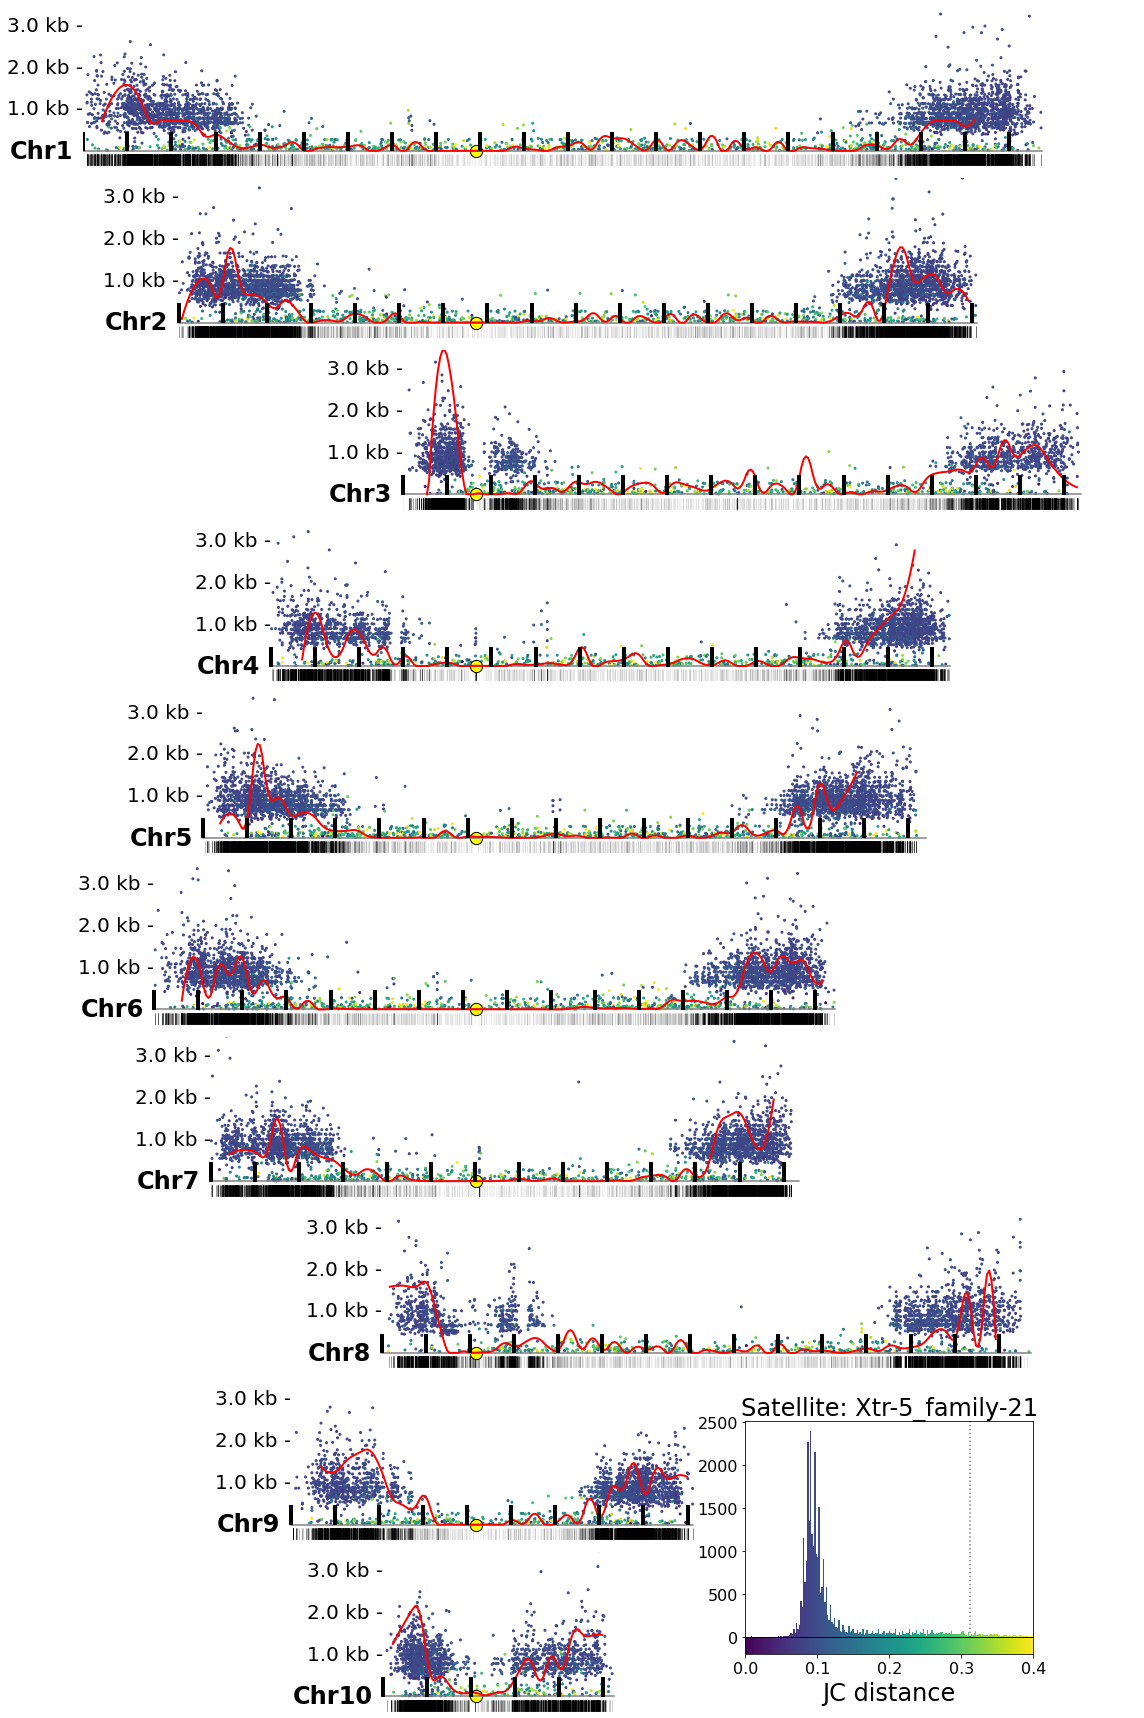

In [13]:
####### FOR PAPER
import matplotlib as mpl

Mb = 1000000

#Repeat_gff_reclassified = Xtr_rm_reclassified
Repeat_gff_reclassified = pd.read_csv(os.path.join(sup_fig_panel_dir,"Supplementary_Fig.11b_SatJC_Xtr-5_family-21.bed"), sep="\t", names=["Chr","Start","End","Motif","JC"])
Repeat_gff_reclassified['Length'] =  abs(Repeat_gff_reclassified.End - Repeat_gff_reclassified.Start)

blast_Cent_consensus_ = pd.read_csv(os.path.join(sup_fig_panel_dir,"Supplementary_Fig.11b_SatJC_Xtr-5_family-21.blast.tsv"), sep="\t", names=['qseqid','Chr','pident','length','mismatch','gapopen','qstart','qend','sstart','send','evalue','bitscore'])
blast_Cent_consensus_ = blast_Cent_consensus_[blast_Cent_consensus_.Chr.str.startswith('Chr')]
blast_Cent_consensus_['midpoint'] = (blast_Cent_consensus_.sstart +blast_Cent_consensus_.send)/2
blast_Cent_consensus_ = blast_Cent_consensus_.sort_values(['Chr','sstart','send'])


figure_size = (16,24)
scaler = 2


JC_max_val=0.5

repeat_name_ = 'Satellite: Xtr-5_family-21'
monomer_name_ = 'Chr3:13229190-13230304:113,9.9,113'
title = repeat_name_

JC_max_val = np.round(np.percentile(Repeat_gff_reclassified[(Repeat_gff_reclassified.Motif.isin([repeat_name_]))].JC,99),1) 

list_chromosomes = chr_sizes.Chr.tolist()

CTR_pos_Chr1 = list(Xtrop_centromere_positon[Xtrop_centromere_positon.Chr=='Chr1'].TandemRepeats)[0]

Largest_chr_len = float(chr_sizes.Length.max())*1.1


max_y_value, max_axis = 1,1
min_axis = -0.1

max_Length_sat = np.percentile(Repeat_gff_reclassified[(Repeat_gff_reclassified.Motif==repeat_name_)].Length,99.9)
counter = 0
fig, axs = plt.subplots(len(list_chromosomes), figsize=figure_size)



for Chr_ in list_chromosomes:
    To_plot = Repeat_gff_reclassified[(Repeat_gff_reclassified.Chr==Chr_)]
    To_plot2 = blast_Cent_consensus_[(blast_Cent_consensus_.Chr==Chr_)]  

    Chr_size_ = list(chr_sizes[chr_sizes.Chr==Chr_].Length)[0]
    CTR_pos = list(Xtrop_centromere_positon[Xtrop_centromere_positon.Chr==Chr_].TandemRepeats)[0]
    delta_centromere = CTR_pos_Chr1 - CTR_pos
    CTR_pos_normalized =(CTR_pos+delta_centromere)/Largest_chr_len
    chr_size_normalized = (Chr_size_+delta_centromere)/Largest_chr_len
    
    axs[counter].set_xlim((0, 1))
    axs[counter].set_ylim((min_axis*1, max_axis*1))
    
    axs[counter].text(delta_centromere/Largest_chr_len-0.01, 0, Chr_, fontsize=12*scaler, ha='right', va='center' , fontweight='bold')
    axs[counter].axhline(0,xmin=delta_centromere/Largest_chr_len, xmax=chr_size_normalized, color='gray')

    for repeat_name in [repeat_name_] :
        axs[counter].scatter((To_plot[To_plot.Motif==repeat_name].Start + delta_centromere)/Largest_chr_len, (To_plot[To_plot.Motif==repeat_name].Length)/max_Length_sat, c= To_plot[To_plot.Motif==repeat_name].JC,  alpha=1 , s=2*scaler, label=repeat_name,  cmap='viridis', vmax=JC_max_val, vmin=0) 
   
    ypos_inc = increment = (1/float(len([monomer_name_])))
        
    axs[counter].spines['top'].set_visible(False)
    axs[counter].spines['right'].set_visible(False)
    axs[counter].spines['bottom'].set_visible(False)
    axs[counter].spines['left'].set_visible(False)
    axs[counter].get_xaxis().set_ticks([])
    axs[counter].get_yaxis().set_ticks([])
    
    if len(Rec_rate) > 0:
        x_positon = (Rec_rate[Rec_rate.Chr==Chr_]['Pos'] + Rec_rate[Rec_rate.Chr==Chr_].delta_pos/2) + delta_centromere
        x_positon_normalized = (x_positon)/Largest_chr_len
        axs[counter].plot(x_positon_normalized,Rec_rate[Rec_rate.Chr==Chr_].Smooth_Recombination_Rate*max_axis/Rec_rate.Smooth_Recombination_Rate.max(), color='red', linewidth=1*scaler, alpha=1)

    ypos_inc = increment = (1/float(len([monomer_name_])))
    for monomer_name in [monomer_name_] :
        axs[counter].scatter(np.array((To_plot2[To_plot2.qseqid==monomer_name].midpoint + delta_centromere)/Largest_chr_len), len(To_plot2[To_plot2.qseqid==monomer_name].midpoint)*[-.1], marker='|', alpha=.1 , s=250*scaler, linewidth=.5, color='black',  label=monomer_name)

    
    for y_pos in range(0,int(max_Length_sat),1000):
        if y_pos>0:
            #axs[counter].text((Chr_size_+ delta_centromere)/Largest_chr_len,y_pos/float(max_Length_sat),''.join((str(y_pos),' bp')), fontsize=10, horizontalalignment='right', va='center')
            axs[counter].text(delta_centromere/Largest_chr_len,y_pos/float(max_Length_sat),''.join((str(y_pos/1000),' kb -')), fontsize=10*scaler, horizontalalignment='right', va='center')
    
    axs[counter].scatter(CTR_pos_normalized, 0, alpha=1, s=75*scaler, facecolor='yellow', edgecolors='black',  marker="o")#color='white')  # Centromere dot at the center of each chr

    for tick_10Mb in range(0, Chr_size_, 10*Mb):
        normalized_tick = (tick_10Mb  +delta_centromere)/Largest_chr_len  
        axs[counter].axvline(normalized_tick, ymin=0.1, ymax= .2,  alpha=1, color='black', linewidth=2*scaler)
        #axs[counter].axvline(normalized_tick, ymin=-.1, ymax= .05,  alpha=1, color='black', linewidth=2) 
    counter=counter+1


    
x_p = 0.65  ; y_p = 0.04 
width_ = 0.25; height_ = 0.01
cax = fig.add_axes([x_p, y_p, width_, height_])
cmap = mpl.cm.viridis

norm = mpl.colors.Normalize(vmin=0, vmax=JC_max_val )
cb2 = mpl.colorbar.ColorbarBase(cax, cmap=cmap,  norm=norm, orientation='horizontal')
label_ =''.join(('JC distance'))
cb2.set_label(label_, labelpad=5, y=1.2, fontsize=12*scaler)
x_tix_box = list(np.arange(0,JC_max_val+.1,.1))
cb2.set_ticks(x_tix_box,x_tix_box)
for t in cb2.ax.get_xticklabels():
     t.set_fontsize(8*scaler)
#cb2.tick_params(fontsize=10*scaler)
#cb2.tick_params(cb2.get_xticklabels(), fontsize=10*scaler)#, fontweight="bold", horizontalalignment="left")


x_p = x_p  ; y_p = y_p+height_
width_ = 0.25; height_ = 0.125
dax = fig.add_axes([x_p, y_p, width_, height_])

data= Repeat_gff_reclassified[(Repeat_gff_reclassified.Motif.isin([repeat_name_]))].JC 
Y,X = np.histogram(data, bins='auto')
x_span = JC_max_val
C = pd.Series(X).apply(lambda x: cmap(norm(x))).to_list()
width_hist=(X[1]-X[0])/2

dax.bar(X[:-1]-width_hist,Y,color=C,width=X[1]-X[0])
dax.set_xlim(-.01, JC_max_val)
dax.set_xticks([])
dax.set_title(repeat_name_, fontsize=12*scaler)
for t in dax.get_yticklabels():
    t.set_fontsize(8*scaler)
        
dax.axvline(np.percentile(data,95), ls=':',alpha=0.5, color='black')
print(len(data), len(X), max(Y), np.percentile(data,95))
plt.tight_layout()

#out_fig_name = ''.join(('~/SAPS/X_tropicalis_V10_Final/DATA_OUT/Xtropicalis__',repeat_name_.replace(':','').replace('/','').replace(' ','_'),'_2000ppi.pdf'))
#out_fig_name= out_fig_name.replace(':','_')
#print "Saved as", out_fig_name
#plt.savefig(out_fig_name, bbox_inches='tight', transparent=True, ppi=2000)
plt.show()

###OK for publication :D. Then convert to TIFF (300 ppi)



/tmp/ipykernel_111020/4055890987.py:106: MatplotlibDeprecationWarning: 
The 'update_ticks' parameter of set_ticks() was deprecated in Matplotlib 3.5 and will be removed two minor releases later. If any parameter follows 'update_ticks', they should be passed as keyword, not positionally.
  cb2.set_ticks(x_tix_box,x_tix_box)
/tmp/ipykernel_111020/4055890987.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


4037 95 624 0.2744368457017603


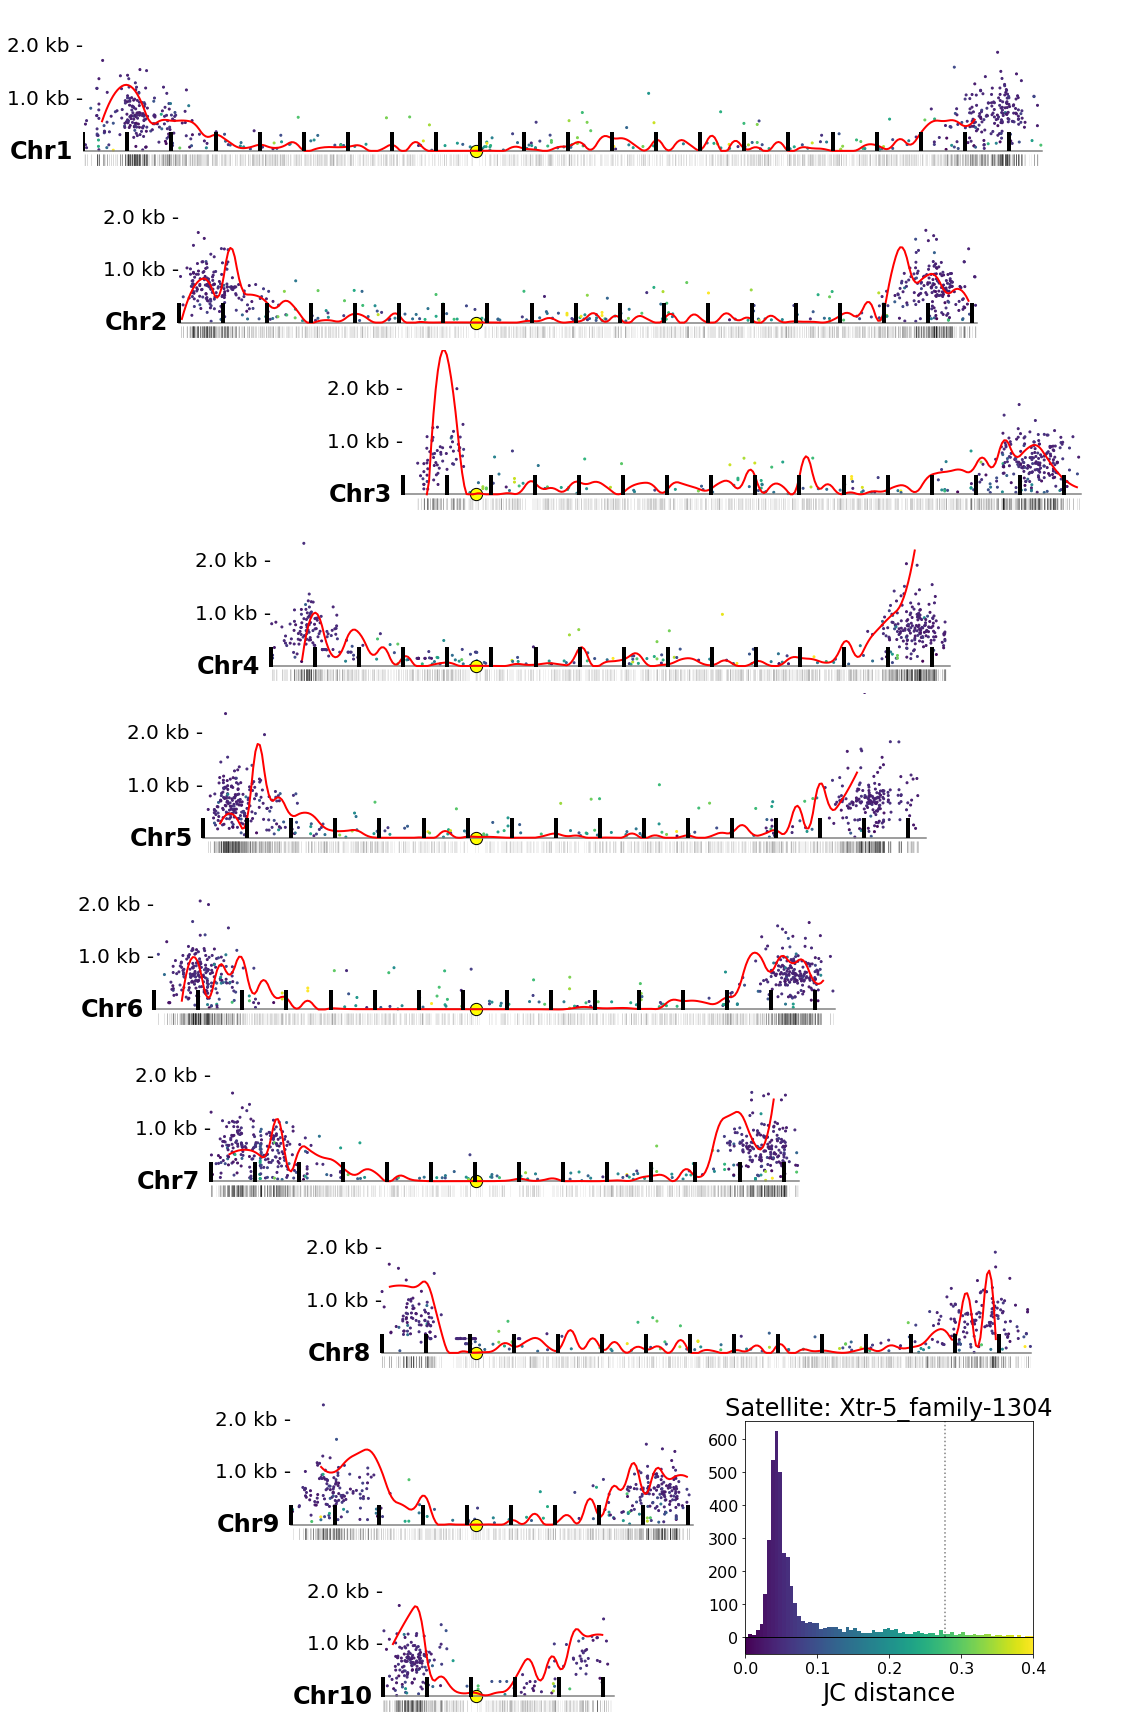

In [14]:
####### FOR PAPER
import matplotlib as mpl

Mb = 1000000

#Repeat_gff_reclassified = Xtr_rm_reclassified
Repeat_gff_reclassified = pd.read_csv(os.path.join(sup_fig_panel_dir,"Supplementary_Fig.11b_SatJC_Xtr-5_family-1304.bed"), sep="\t", names=["Chr","Start","End","Motif","JC"])
Repeat_gff_reclassified['Length'] =  abs(Repeat_gff_reclassified.End - Repeat_gff_reclassified.Start)

blast_Cent_consensus_ = pd.read_csv(os.path.join(sup_fig_panel_dir,"Supplementary_Fig.11b_SatJC_Xtr-5_family-1304.blast.tsv"), sep="\t", names=['qseqid','Chr','pident','length','mismatch','gapopen','qstart','qend','sstart','send','evalue','bitscore'])
blast_Cent_consensus_ = blast_Cent_consensus_[blast_Cent_consensus_.Chr.str.startswith('Chr')]
blast_Cent_consensus_['midpoint'] = (blast_Cent_consensus_.sstart +blast_Cent_consensus_.send)/2
blast_Cent_consensus_ = blast_Cent_consensus_.sort_values(['Chr','sstart','send'])

figure_size = (16,24)
scaler = 2


JC_max_val=0.5

repeat_name_ = 'Satellite: Xtr-5_family-1304'
monomer_name_ = 'Chr3:13648061-13649255:252,4.8,252'
title = repeat_name_

JC_max_val = np.round(np.percentile(Repeat_gff_reclassified[(Repeat_gff_reclassified.Motif.isin([repeat_name_]))].JC,99),1) 

list_chromosomes = chr_sizes.Chr.tolist()

CTR_pos_Chr1 = list(Xtrop_centromere_positon[Xtrop_centromere_positon.Chr=='Chr1'].TandemRepeats)[0]

Largest_chr_len = float(chr_sizes.Length.max())*1.1


max_y_value, max_axis = 1,1
min_axis = -0.1

max_Length_sat = np.percentile(Repeat_gff_reclassified[(Repeat_gff_reclassified.Motif==repeat_name_)].Length,99.9)
counter = 0
fig, axs = plt.subplots(len(list_chromosomes), figsize=figure_size)



for Chr_ in list_chromosomes:
    To_plot = Repeat_gff_reclassified[(Repeat_gff_reclassified.Chr==Chr_)]
    To_plot2 = blast_Cent_consensus_[(blast_Cent_consensus_.Chr==Chr_)]  

    Chr_size_ = list(chr_sizes[chr_sizes.Chr==Chr_].Length)[0]
    CTR_pos = list(Xtrop_centromere_positon[Xtrop_centromere_positon.Chr==Chr_].TandemRepeats)[0]
    delta_centromere = CTR_pos_Chr1 - CTR_pos
    CTR_pos_normalized =(CTR_pos+delta_centromere)/Largest_chr_len
    chr_size_normalized = (Chr_size_+delta_centromere)/Largest_chr_len
    
    axs[counter].set_xlim((0, 1))
    axs[counter].set_ylim((min_axis*1, max_axis*1))
    
    axs[counter].text(delta_centromere/Largest_chr_len-0.01, 0, Chr_, fontsize=12*scaler, ha='right', va='center' , fontweight='bold')
    axs[counter].axhline(0,xmin=delta_centromere/Largest_chr_len, xmax=chr_size_normalized, color='gray')

    for repeat_name in [repeat_name_] :
        axs[counter].scatter((To_plot[To_plot.Motif==repeat_name].Start + delta_centromere)/Largest_chr_len, (To_plot[To_plot.Motif==repeat_name].Length)/max_Length_sat, c= To_plot[To_plot.Motif==repeat_name].JC,  alpha=1 , s=2*scaler, label=repeat_name,  cmap='viridis', vmax=JC_max_val, vmin=0) 
   
    ypos_inc = increment = (1/float(len([monomer_name_])))
        
    axs[counter].spines['top'].set_visible(False)
    axs[counter].spines['right'].set_visible(False)
    axs[counter].spines['bottom'].set_visible(False)
    axs[counter].spines['left'].set_visible(False)
    axs[counter].get_xaxis().set_ticks([])
    axs[counter].get_yaxis().set_ticks([])
    
    if len(Rec_rate) > 0:
        x_positon = (Rec_rate[Rec_rate.Chr==Chr_]['Pos'] + Rec_rate[Rec_rate.Chr==Chr_].delta_pos/2) + delta_centromere
        x_positon_normalized = (x_positon)/Largest_chr_len
        axs[counter].plot(x_positon_normalized,Rec_rate[Rec_rate.Chr==Chr_].Smooth_Recombination_Rate*max_axis/Rec_rate.Smooth_Recombination_Rate.max(), color='red', linewidth=1*scaler, alpha=1)

    ypos_inc = increment = (1/float(len([monomer_name_])))
    for monomer_name in [monomer_name_] :
        axs[counter].scatter(np.array((To_plot2[To_plot2.qseqid==monomer_name].midpoint + delta_centromere)/Largest_chr_len), len(To_plot2[To_plot2.qseqid==monomer_name].midpoint)*[-.1], marker='|', alpha=0.1 , s=250*scaler, linewidth=.5, color='black',  label=monomer_name)

    
    for y_pos in range(0,int(max_Length_sat),1000):
        if y_pos>0:
            #axs[counter].text((Chr_size_+ delta_centromere)/Largest_chr_len,y_pos/float(max_Length_sat),''.join((str(y_pos),' bp')), fontsize=10, horizontalalignment='right', va='center')
            axs[counter].text(delta_centromere/Largest_chr_len,y_pos/float(max_Length_sat),''.join((str(y_pos/1000),' kb -')), fontsize=10*scaler, horizontalalignment='right', va='center')
    
    axs[counter].scatter(CTR_pos_normalized, 0, alpha=1, s=75*scaler, facecolor='yellow', edgecolors='black',  marker="o")#color='white')  # Centromere dot at the center of each chr

    for tick_10Mb in range(0, Chr_size_, 10*Mb):
        normalized_tick = (tick_10Mb  +delta_centromere)/Largest_chr_len  
        axs[counter].axvline(normalized_tick, ymin=0.1, ymax= .2,  alpha=1, color='black', linewidth=2*scaler)
        #axs[counter].axvline(normalized_tick, ymin=-.1, ymax= .05,  alpha=1, color='black', linewidth=2) 
    counter=counter+1


    
x_p = 0.65  ; y_p = 0.04 
width_ = 0.25; height_ = 0.01
cax = fig.add_axes([x_p, y_p, width_, height_])
cmap = mpl.cm.viridis

norm = mpl.colors.Normalize(vmin=0, vmax=JC_max_val )
cb2 = mpl.colorbar.ColorbarBase(cax, cmap=cmap,  norm=norm, orientation='horizontal')
label_ =''.join(('JC distance'))
cb2.set_label(label_, labelpad=5, y=1.2, fontsize=12*scaler)
x_tix_box = list(np.arange(0,JC_max_val+.1,.1))
cb2.set_ticks(x_tix_box,x_tix_box)
for t in cb2.ax.get_xticklabels():
     t.set_fontsize(8*scaler)
#cb2.tick_params(fontsize=10*scaler)
#cb2.tick_params(cb2.get_xticklabels(), fontsize=10*scaler)#, fontweight="bold", horizontalalignment="left")


x_p = x_p  ; y_p = y_p+height_
width_ = 0.25; height_ = 0.125
dax = fig.add_axes([x_p, y_p, width_, height_])

data= Repeat_gff_reclassified[(Repeat_gff_reclassified.Motif.isin([repeat_name_]))].JC 
Y,X = np.histogram(data, bins='auto')
x_span = JC_max_val
C = pd.Series(X).apply(lambda x: cmap(norm(x))).to_list()
width_hist=(X[1]-X[0])/2

dax.bar(X[:-1]-width_hist,Y,color=C,width=X[1]-X[0])
dax.set_xlim(-.01, JC_max_val)
dax.set_xticks([])
dax.set_title(repeat_name_, fontsize=12*scaler)
for t in dax.get_yticklabels():
    t.set_fontsize(8*scaler)
        
dax.axvline(np.percentile(data,95), ls=':',alpha=0.5, color='black')
print(len(data), len(X), max(Y), np.percentile(data,95))
plt.tight_layout()

#out_fig_name = ''.join(('~/SAPS/X_tropicalis_V10_Final/DATA_OUT/Xtropicalis__',repeat_name_.replace(':','').replace('/','_').replace(' ','_'),'_2000ppi.pdf'))
#out_fig_name= out_fig_name.replace(':','_')
#print "Saved as", out_fig_name
#plt.savefig(out_fig_name, bbox_inches='tight', transparent=True, ppi=2000)
plt.show()

###OK for publication :D. Then convert to TIFF (300 ppi)



/tmp/ipykernel_111020/562395350.py:112: MatplotlibDeprecationWarning: 
The 'update_ticks' parameter of set_ticks() was deprecated in Matplotlib 3.5 and will be removed two minor releases later. If any parameter follows 'update_ticks', they should be passed as keyword, not positionally.
  cb2.set_ticks(x_tix_box,x_tix_box)
/tmp/ipykernel_111020/562395350.py:162: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


12102 51 2585 0.3739664410487934


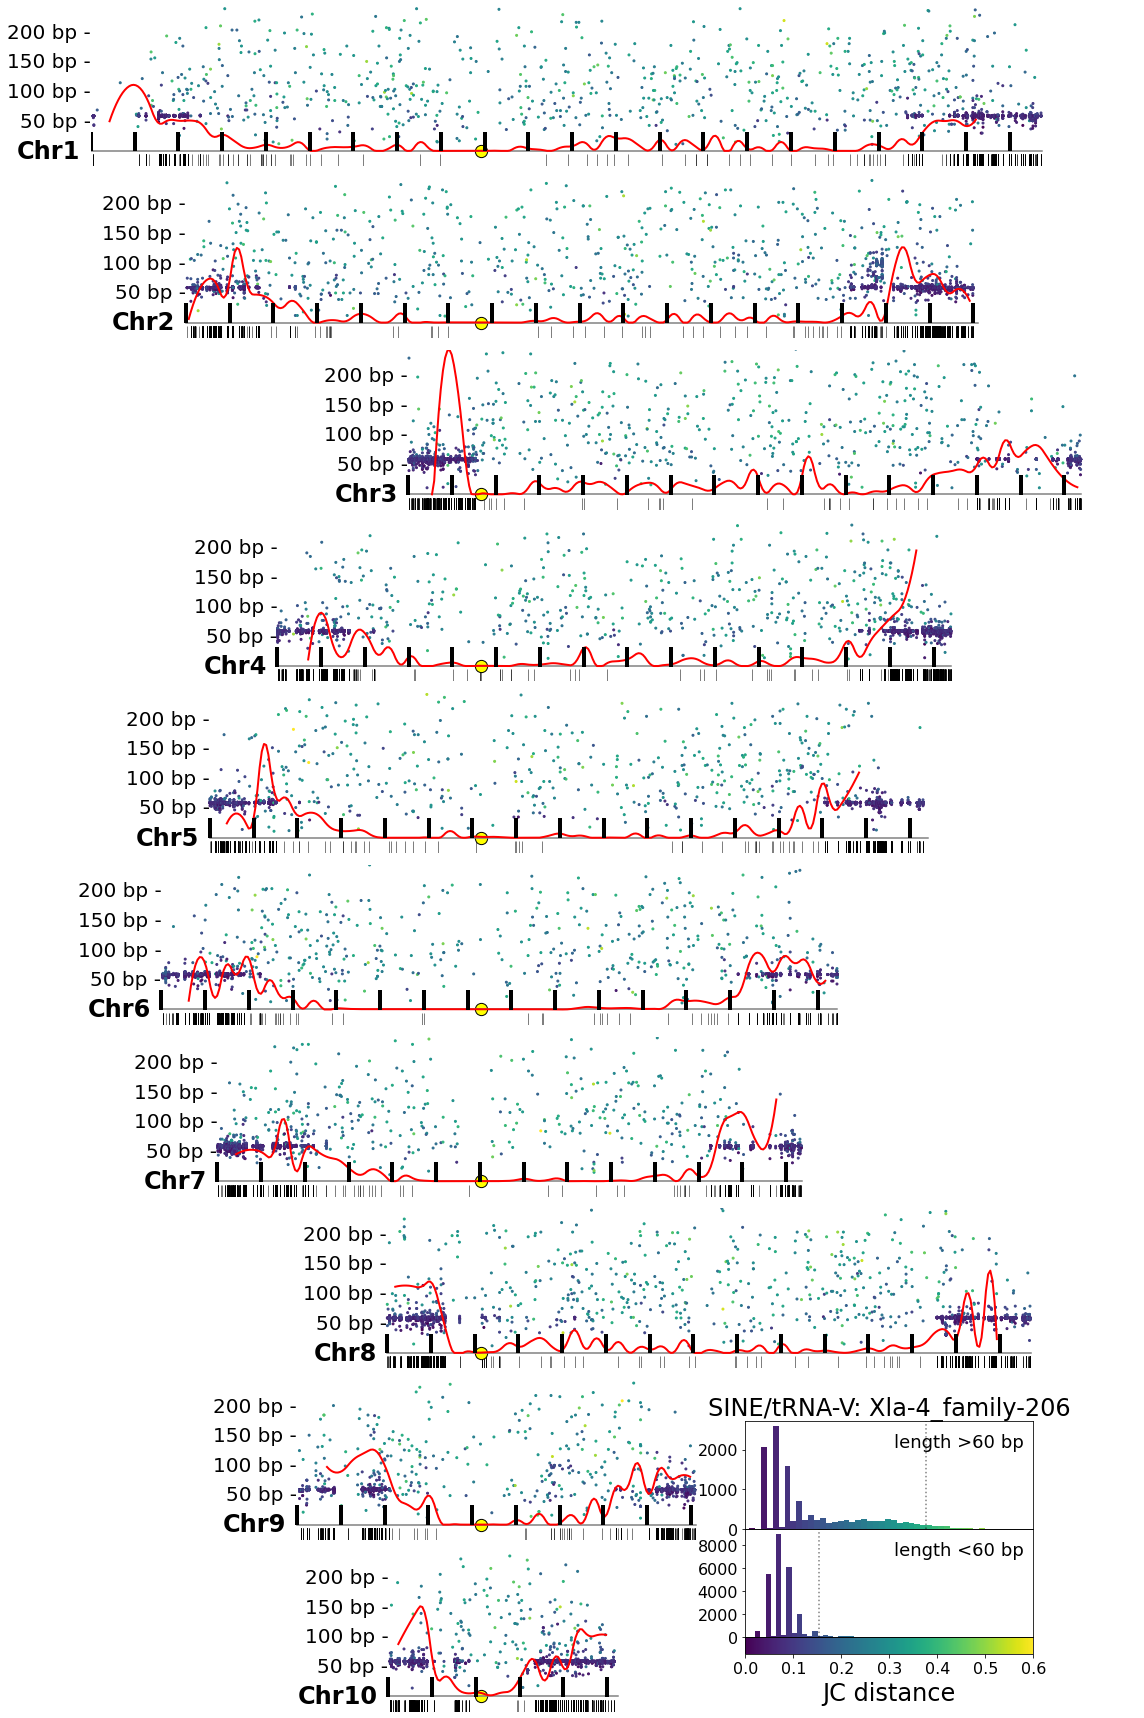

In [12]:
####### FOR PAPER
import matplotlib as mpl

Mb = 1000000

#Repeat_gff_reclassified = Xtr_rm_reclassified
Repeat_gff_reclassified = pd.read_csv(os.path.join(sup_fig_panel_dir,"Supplementary_Fig.11b_SatJC_Xla-4_family-206.bed"), sep="\t", names=["Chr","Start","End","Motif","JC"])
Repeat_gff_reclassified['Length'] =  abs(Repeat_gff_reclassified.End - Repeat_gff_reclassified.Start)

blast_Cent_consensus_ = pd.read_csv(os.path.join(sup_fig_panel_dir,"Supplementary_Fig.11b_SatJC_Xla-4_family-206.blast.tsv"), sep="\t", names=['qseqid','Chr','pident','length','mismatch','gapopen','qstart','qend','sstart','send','evalue','bitscore'])
blast_Cent_consensus_ = blast_Cent_consensus_[blast_Cent_consensus_.Chr.str.startswith('Chr')]
blast_Cent_consensus_['midpoint'] = (blast_Cent_consensus_.sstart +blast_Cent_consensus_.send)/2
blast_Cent_consensus_ = blast_Cent_consensus_.sort_values(['Chr','sstart','send'])

figure_size = (16,24)
scaler = 2


JC_max_val=0.5

repeat_name_ = 'SINE/tRNA-V: Xla-4_family-206'
monomer_name_ = 'Chr3:13767515-13767949:52,8.5,52'
title = repeat_name_

JC_max_val = np.round(np.percentile(Repeat_gff_reclassified[(Repeat_gff_reclassified.Motif.isin([repeat_name_]))].JC,99),1) 
JC_max_val = .6

list_chromosomes = chr_sizes.Chr.tolist()

CTR_pos_Chr1 = list(Xtrop_centromere_positon[Xtrop_centromere_positon.Chr=='Chr1'].TandemRepeats)[0]

Largest_chr_len = float(chr_sizes.Length.max())*1.1


max_y_value, max_axis = 1,1
min_axis = -0.1

max_Length_sat = np.percentile(Repeat_gff_reclassified[(Repeat_gff_reclassified.Motif==repeat_name_)].Length,99.9)
counter = 0
fig, axs = plt.subplots(len(list_chromosomes), figsize=figure_size)



for Chr_ in list_chromosomes:
    To_plot = Repeat_gff_reclassified[(Repeat_gff_reclassified.Chr==Chr_)]
    To_plot2 = blast_Cent_consensus_[(blast_Cent_consensus_.Chr==Chr_)]  

    Chr_size_ = list(chr_sizes[chr_sizes.Chr==Chr_].Length)[0]
    CTR_pos = list(Xtrop_centromere_positon[Xtrop_centromere_positon.Chr==Chr_].TandemRepeats)[0]
    delta_centromere = CTR_pos_Chr1 - CTR_pos
    CTR_pos_normalized =(CTR_pos+delta_centromere)/Largest_chr_len
    chr_size_normalized = (Chr_size_+delta_centromere)/Largest_chr_len
    
    axs[counter].set_xlim((0, 1))
    axs[counter].set_ylim((min_axis*1, max_axis*1))
    
    axs[counter].text(delta_centromere/Largest_chr_len-0.01, 0, Chr_, fontsize=12*scaler, ha='right', va='center' , fontweight='bold')
    axs[counter].axhline(0,xmin=delta_centromere/Largest_chr_len, xmax=chr_size_normalized, color='gray')

    for repeat_name in [repeat_name_] :
        axs[counter].scatter((To_plot[To_plot.Motif==repeat_name].Start + delta_centromere)/Largest_chr_len, (To_plot[To_plot.Motif==repeat_name].Length)/max_Length_sat, c= To_plot[To_plot.Motif==repeat_name].JC,  alpha=1 , s=2*scaler, label=repeat_name,  cmap='viridis', vmax=JC_max_val, vmin=0) 
   
    ypos_inc = increment = (1/float(len([monomer_name_])))
        
    axs[counter].spines['top'].set_visible(False)
    axs[counter].spines['right'].set_visible(False)
    axs[counter].spines['bottom'].set_visible(False)
    axs[counter].spines['left'].set_visible(False)
    axs[counter].get_xaxis().set_ticks([])
    axs[counter].get_yaxis().set_ticks([])
    
    if len(Rec_rate) > 0:
        x_positon = (Rec_rate[Rec_rate.Chr==Chr_]['Pos'] + Rec_rate[Rec_rate.Chr==Chr_].delta_pos/2) + delta_centromere
        x_positon_normalized = (x_positon)/Largest_chr_len
        axs[counter].plot(x_positon_normalized,Rec_rate[Rec_rate.Chr==Chr_].Smooth_Recombination_Rate*max_axis/Rec_rate.Smooth_Recombination_Rate.max(), color='red', linewidth=1*scaler, alpha=1)

    ypos_inc = increment = (1/float(len([monomer_name_])))
    for monomer_name in [monomer_name_] :
        axs[counter].scatter(np.array((To_plot2[To_plot2.qseqid==monomer_name].midpoint + delta_centromere)/Largest_chr_len), len(To_plot2[To_plot2.qseqid==monomer_name].midpoint)*[-.1], marker='|', alpha=1 , s=250*scaler, linewidth=.5, color='black',  label=monomer_name)

    
    for y_pos in range(0,int(max_Length_sat),50):
        if y_pos>0:
            #axs[counter].text((Chr_size_+ delta_centromere)/Largest_chr_len,y_pos/float(max_Length_sat),''.join((str(y_pos),' bp')), fontsize=10, horizontalalignment='right', va='center')
            axs[counter].text(delta_centromere/Largest_chr_len,y_pos/float(max_Length_sat),''.join((str(y_pos),' bp -')), fontsize=10*scaler, horizontalalignment='right', va='center')
    
    axs[counter].scatter(CTR_pos_normalized, 0, alpha=1, s=75*scaler, facecolor='yellow', edgecolors='black',  marker="o")#color='white')  # Centromere dot at the center of each chr

    for tick_10Mb in range(0, Chr_size_, 10*Mb):
        normalized_tick = (tick_10Mb  +delta_centromere)/Largest_chr_len  
        axs[counter].axvline(normalized_tick, ymin=0.1, ymax= .2,  alpha=1, color='black', linewidth=2*scaler)
        #axs[counter].axvline(normalized_tick, ymin=-.1, ymax= .05,  alpha=1, color='black', linewidth=2) 
    counter=counter+1


    
x_p = 0.65  ; y_p = 0.04 
width_ = 0.25; height_ = 0.01
cax = fig.add_axes([x_p, y_p, width_, height_])
cmap = mpl.cm.viridis

norm = mpl.colors.Normalize(vmin=0, vmax=JC_max_val )
cb2 = mpl.colorbar.ColorbarBase(cax, cmap=cmap,  norm=norm, orientation='horizontal')
label_ =''.join(('JC distance'))
cb2.set_label(label_, labelpad=5, y=1.2, fontsize=12*scaler)
x_tix_box = list(np.arange(0,JC_max_val+.1,.1))
cb2.set_ticks(x_tix_box,x_tix_box)
for t in cb2.ax.get_xticklabels():
     t.set_fontsize(8*scaler)
#cb2.tick_params(fontsize=10*scaler)
#cb2.tick_params(cb2.get_xticklabels(), fontsize=10*scaler)#, fontweight="bold", horizontalalignment="left")


### 1)
x_p = x_p  ; y_p = y_p+height_
width_ = 0.25; height_ = 0.125/2
dax = fig.add_axes([x_p, y_p, width_, height_])

data= Repeat_gff_reclassified[(Repeat_gff_reclassified.Motif.isin([repeat_name_])) & (Repeat_gff_reclassified.Length<60)].JC 
Y,X = np.histogram(data, bins=50)
x_span = JC_max_val
C = pd.Series(X).apply(lambda x: cmap(norm(x))).to_list()
width_hist=(X[1]-X[0])/2

dax.bar(X[:-1]-width_hist,Y,color=C,width=X[1]-X[0])
dax.set_xlim(-.01, JC_max_val)
dax.set_xticks([])
dax.text(.58,max(Y)*.8,'length <60 bp', fontsize = 9*scaler, ha='right')
#dax.set_title(repeat_name_, fontsize=12*scaler)
for t in dax.get_yticklabels():
    t.set_fontsize(8*scaler)     
dax.axvline(np.percentile(data,95), ls=':',alpha=0.5, color='black')

### 2)
x_p = x_p  ; y_p = y_p+0.125/2
width_ = 0.25; height_ = 0.125/2
dax = fig.add_axes([x_p, y_p, width_, height_])

data= Repeat_gff_reclassified[(Repeat_gff_reclassified.Motif.isin([repeat_name_])) & (Repeat_gff_reclassified.Length>=60)].JC 
Y,X = np.histogram(data, bins=50)
x_span = JC_max_val
C = pd.Series(X).apply(lambda x: cmap(norm(x))).to_list()
width_hist=(X[1]-X[0])/2

dax.bar(X[:-1]-width_hist,Y,color=C,width=X[1]-X[0])
dax.set_xlim(-.01, JC_max_val)
dax.set_xticks([])
dax.text(.58,max(Y)*.8,'length >60 bp', fontsize = 9*scaler, ha='right')

dax.set_title(repeat_name_, fontsize=12*scaler)
for t in dax.get_yticklabels():
    t.set_fontsize(8*scaler)     
dax.axvline(np.percentile(data,95), ls=':',alpha=0.5, color='black')


print(len(data), len(X), max(Y), np.percentile(data,95))
plt.tight_layout()

#out_fig_name = ''.join(('~/SAPS/X_tropicalis_V10_Final/DATA_OUT/Xtropicalis__',repeat_name_.replace(':','').replace('/','_').replace(' ','_'),'_2000ppi.pdf'))
#out_fig_name= out_fig_name.replace(':','_')
#print "Saved as", out_fig_name
#plt.savefig(out_fig_name, bbox_inches='tight', transparent=True, ppi=2000)
plt.show()

###OK for publication :D. Then convert to TIFF (300 ppi)


